This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go). It includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. These are the raw attributes used for calculating how much damage an attack will do in the games.       

  
Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

Hypothesis; legendary pokemon are overrated  
null hypothesis: legendary pokemon are not overrated  
alternative: legendary pokemon are indeed overrated  


In [ ]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv'
poke_df = pd.read_csv(data_url) #assign datafram
poke_df


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
test = pd.DataFrame(poke_df, columns=['Name', 'Total', 'Legendary']) #sort the variables we want
test

,Name,Total,Legendary
0,Bulbasaur,318,False
1,Ivysaur,405,False
2,Venusaur,525,False
3,VenusaurMega Venusaur,625,False
4,Charmander,309,False
...,...,...,...
795,Diancie,600,True
796,DiancieMega Diancie,700,True
797,HoopaHoopa Confined,600,True
798,HoopaHoopa Unbound,680,True


In [ ]:
legend = poke_df['Legendary']
legend_count = legend.value_counts() #checks number of true and false, total num of sample is 800
#to find total of false subtract length by num of true
#legend_count
legend_true = legend.sum() #number of true, 65, first sample size
legend_false = len(legend) - legend_true #number of false, 735, second sample size

print(f'The number of legendary pokemon is {legend_true}')
print(f'The number of non-legendary pokemon is {legend_false}')

#hypothesis, are legendary pokemon worse than non-legendary
#compare total

#null = Legendary pokemon are not better than non-legendary
#alternative = Legendary pokemon are better than non-legendary


The number of legendary pokemon is 65
The number of non-legendary pokemon is 735


In [ ]:
#separate legendary and non-legendary to two dataframes
true_df = poke_df[poke_df['Legendary'] == True] #creates a data frame of only legendary pokemon
#true_df
trueT_df = true_df[['Total', 'Legendary']] #sort only legendary pokemon and their respective total stat
trueT_df

,Total,Legendary
156,580,True
157,580,True
158,580,True
162,680,True
163,780,True
...,...,...
795,600,True
796,700,True
797,600,True
798,680,True


In [ ]:
false_df = poke_df[poke_df['Legendary'] == False] #create dataframe of onlny non legendary pokemon
#false_df
falseT_df = false_df[['Total', 'Legendary']] #sort only non legendary pokemon and their respective total stat
falseT_df

,Total,Legendary
0,318,False
1,405,False
2,525,False
3,625,False
4,309,False
...,...,...
787,494,False
788,304,False
789,514,False
790,245,False


In [ ]:
#trueT_df.describe()

In [ ]:
#since we only need the total stat to calculate our statistics
true_mean = round(trueT_df['Total'].mean(), 2)
false_mean = round(false_df['Total'].mean(), 2)
print(f'The total stat average of legendary pokemon is {true_mean}') #637.38
print(f'The total stat average of non legendary pokemon is {false_mean}') #417.21
#list other variables
print(f'The number of legendary pokemon in the data is {legend_true}') #65
print(f'The number of non legendary pokemon in the data is {legend_false}') #735

The total stat average of legendary pokemon is 637.38
The total stat average of non legendary pokemon is 417.21
The number of legendary pokemon in the data is 65
The number of non legendary pokemon in the data is 735


# Will organize code later   
Calculate statistics below
#pranavi

In [ ]:
#calculating degrees of freedom
df = (legend_true - 1) + (legend_false - 1) #798

798

Given our degrees of freedom and out null and alternative hypothesis, we can state a decision rule where we either reject or do not reject the null hypothesis  
Assuming we're setting alpha (a) = 0.05 with this 2-tailed test, where our critical values are +/- 1.960 based on the z-table, if our t-statistic is less than or greater than 1.960 we can reject the null, otherwise do not reject the null.

In [ ]:
#calculating standard error
#t-test for independent means
import numpy as np
#obtain standard deviations from legendary and non-legendary pokemon
legend_sd = round(trueT_df['Total'].std(), 2) #60.94
nonle_sd = round(false_df['Total'].std(), 2) #106.76
se = round(np.sqrt(((legend_sd ** 2) / legend_true) + ((nonle_sd ** 2) / legend_false)), 2) #8.52
se

8.52

In [ ]:
#calculate t-statistic
t_stat = round((true_mean - false_mean) / se, 2) #25.84
t_stat

25.84

##final steps  
arav

In [ ]:
crit_v = 1.960
if t_stat > crit_v or t_stat < -crit_v:
  print('Reject null hypothesis')
else:
  print('Do not reject null hypothesis')

Reject null hypothesis


Given that the t-statistic is 25.84, it is greater than our critical value
  
25.84 > 1.96  
because of this we will reject the null hypothesis when a=0.05 (probability < 0.05)

In [ ]:
#draw a conclusion from the analysis
#print(f'The total stat means of a legendary pokemon, {true_mean}, in a sample of {legend_true}, and the mean of non-legendary pokemon, {false_mean}, in a sample size of {legend_false}, was significantly more stronger than the other, where our t-statistic with the degrees of freedom {df} is {t_stat}, p < 0.05')


The total stat means of a legendary pokemon, 637.38, in a sample of 65, and the mean of non-legendary pokemon, 417.21, in a sample size of 735, was significantly more stronger than the other, where our t-statistic with the degrees of freedom 798 is 25.84, p < 0.05


##The total stat means of a legendary pokemon, 637.38, in a sample of size 65, and the mean of non-legendary pokemon, 417.21, in a sample size of 735, was significantly greater than the other, where our t-statistic with the degrees of freedom (798), is 25.84, where the probability is less than alpha(0.05)

Based on the result of our analysis, this does support the research hypothesis that legendary pokemon will have greater total stats over non-legendary pokemon and their total stats.

##**Final Report**

[Google Doc final report](https://docs.google.com/document/d/1s-yuZHMQgb-KOB_WOOJd-ydyODj-hwpk2lTnY1ZLvY4/edit?usp=sharing)  
[Google Presentation](https://docs.google.com/presentation/d/1liiR6StNa-nInXARYXXlJZvVxFhSWjdVCfwbvkUrAR8/edit?usp=sharing)  
[Group oral presentation recording](https://clipchamp.com/watch/6MxvvEAMnmf)  

#Are Legendary Pokemon Overrated?

#By Haoming Yu, Pranavi Immanni, and Arav Bhatt


In this project, we compared the total stats of legendary and non-legendary Pokemon. In a dataset, we were able to see legendary and non-legendary Pokemon where the data provided distinct differences from one another. Such as HP, attack, defense, special attack, special defense, and speed. We used the total stat in the data which allowed us to see the name of the Pokemon and if it was legendary or non-legendary through Boolean. Our hypothesis was, that Legendary Pokemon are stronger than non-legendary. Our null hypothesis was legendary Pokemon are stronger than other Pokemon. And out alternative was legendary Pokemon are stronger than other Pokemon. To prove this, we will be using the Pokemon’s attributes by comparing the ‘total’ and then using statistical analysis finding the mean of said attributes and using t-test and finding critical values to show if there exists a significant difference to either reject or do not reject the null hypothesis.


#**Data**

```
# import pandas as pd


data_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv'
poke_df = pd.read_csv(data_url) #assign datafram
poke_df

#Creating a DataFrame for our Data
```

Here we import pandas as pd- as  our library to read the data columns

The data  is coming from a csv file which contains information about the pokemon. The columns have information about the Name, Type, Total, Attack, non-legendary or legendary, etc.
```
test = pd.DataFrame(poke_df, columns=['Name', 'Total', 'Legendary']) #sort the variables we want
test
#created a subset dataframe (‘test’) to only focus on the Pokemon’s name, the total stats, and whether they are legendary.
```
‘test’ shows the selected variables

Columns: Name, total (stat), Legendary. To indicate if the Pokemon is legendary or not, boolean is implemented
```
legend = poke_df['Legendary']
legend_count = legend.value_counts()
legend_true = legend.sum() #number of true, 65, first sample size
legend_false = len(legend) - legend_true #number of false, 735, second sample size

print(f'The number of legendary pokemon is {legend_true}')
print(f'The number of non-legendary pokemon is {legend_false}')
#We want to determine if the overall stats of legendary Pokémon are statistically better compared to those of non-legendary Pokémon.
#So, to store whether a Pokémon is legendary, we create a Series (‘legend’).
```
In order to figure out how many Pokémon are legendary and which aren't, count the number of times of True and False in the 'Legendary' column.
Hypothesis, null, and alternative
Then we print the number of legendary and non-legendary pokemon
```
#separate legendary and non-legendary to two dataframes
true_df = poke_df[poke_df['Legendary'] == True] #creates a data frame of only legendary pokemon
#true_df
trueT_df = true_df[['Total', 'Legendary']] #sort only legendary pokemon and their respective total stat
trueT_df

false_df = poke_df[poke_df['Legendary'] == False] #create dataframe of onlny non legendary pokemon
#false_df
falseT_df = false_df[['Total', 'Legendary']] #sort only non legendary pokemon and their respective total stat
falseT_df
```
We created two DataFrames which just legendary and non-legendary Pokemon, called true_df and false_df. From each DataFrame, we only want to select the total stat attribute.


#**Methods:**
Our methods included finding the mean, calculating the standard error, degrees of freedom using t-statiscs, and critical value
```
true_mean = round(trueT_df['Total'].mean(), 2)
false_mean = round(false_df['Total'].mean(), 2)
print(f'The total stat average of legendary pokemon is {true_mean}') #637.38
print(f'The total stat average of non legendary pokemon is {false_mean}') #417.21
#list other variables
print(f'The number of legendary pokemon in the data is {legend_true}') #65
print(f'The number of non legendary pokemon in the data is {legend_false}') #735
# Finding the mean
```
Calculate the mean total stat for legendary and non-legendary pokemon from the true or false dataframe   
Then we print the average total stat of legendary and non-legendary pokemon
Identify the number of legendary and non-legendary in the data where the
total stat average of legendary pokemon is 637.38
and total stat average of non-legendary pokemon is 417.21
Number of legendary pokemon in the data is 65
Number of non legendary in the the data is 735
```
#calculating degrees of freedom
df = (legend_true - 1) + (legend_false - 1) #798

Calculating the Degrees of Freedom
```
Two groups being compared: Legendary and non-legendary
To calculate degrees of freedom we subtract 1 from the number of legendary Pokemon and the number of non-legendary Pokemon
Then add the values to get the total degrees of freedom (798)
We can use the df for further statistical analysis to identify the critical value and hypothesis testing.
```
import nump`y as np
#obtain standard deviations from legendary and non-legendary pokemon
legend_sd = round(trueT_df['Total'].std(), 2) #60.94
nonle_sd = round(false_df['Total'].std(), 2) #106.76
se = round(np.sqrt(((legend_sd ** 2) / legend_true) + ((nonle_sd ** 2) / legend_false)), 2) #8.52
se
Standard Error
```
We import numpy as np for numerical operations
Get the standard deviations of legendary and non-legendary Pokémon's total stats.  
‘legend_sd’ is 60.94  
’nonl_sd is 106.76  
We use the formula for standard deviation to do this  
Our standard error is 8.52
```
#calculate t-statistic
t_stat = round((true_mean - false_mean) / se, 2) #25.84
t_stat
```
T-statstic
Calculating t-statistic which is by subtracting true_mean and false_mean and dividing by the standard error (round by 2)
The t-statistic will be compared with critical values from the t-distribution to evaluate the statistical significance of the observed difference in mean total stats between legendary and non-legendary Pokémon.


#**Results**
```
crit_v = 1.960
if t_stat > crit_v or t_stat < -crit_v:
 print('Reject null hypothesis')
else:
 print('Do not reject null hypothesis')

Critical Value
```
A critical value of 1.96 is used for a significance level of alpha = 0.05  
Making a decision:   
If the absolute value of the t-statistics is greater than the critical value, there is enough evidence to reject the null hypothesis  
We have enough evidence to reject the null hypothesis
The statistical analysis indicates that the average total stats of legendary and non-legendary Pokémon varies significantly.

Given that the t-statistic is 25.84, it is greater than our critical value
25.84 > 1.96 because of this we will reject the null hypothesis when a=0.05 (probability < 0.05)


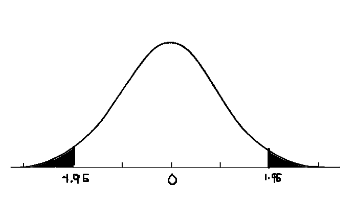

#Conclusion:

Based on our results, our toral stat mean of legendary pokemon is 637.38 in a sample size of 65.
The mean od Non-Legendary pokemon is 417.21 in a sample size of 735

Based on the result of our analysis, this does support the research hypothesis that legendary pokemon are weaker than non-legendary pokemon based on their total stats.